# Prepare data

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from preparation import prepare_data, select_by_date_interval
from plotting import h_bar_plot, get_videos_per_h, month_bar_plot, get_videos_per_month, stacked_bar_with_labels

In [25]:
plt.rcParams['figure.dpi'] = 150 # make your graphs bigger
style.use('seaborn') # apply style for your plot. Hard to read letters in pie charts if style isn't suitable

In [42]:
PATH = "C:/Users/San/Documents/CS projects/yt_activity_analysis/data/Takeout/YouTube and YouTube Music/history/watch-history.json"
df = prepare_data(PATH)

# start_date = "2022-09-01"
# end_date = "2022-09-30"
# df = select_by_date_interval(df, start=start_date)
# df = df.loc[df["app"] == "YouTube Music"] # if you wanna work only with YT Music data
df.head(5)

,video_title,channel_name,time,app
0,Герої,Riffmaster,2022-10-22 15:27:20.264000+03:00,YouTube Music
1,Kozak System - Сила і Зброя,kozaksystem,2022-10-22 15:24:47.497000+03:00,YouTube Music
2,p-values: What they are and how to interpret them,StatQuest with Josh Starmer,2022-10-22 14:46:16.147000+03:00,YouTube
3,"The Central Limit Theorem, Clearly Explained!!!",StatQuest with Josh Starmer,2022-10-22 14:28:45.942000+03:00,YouTube
4,How P-Values Help Us Test Hypotheses: Crash Co...,CrashCourse,2022-10-22 14:22:11.009000+03:00,YouTube


# Figures that require all the available data

### Discover at what hours you watch a particular channel 

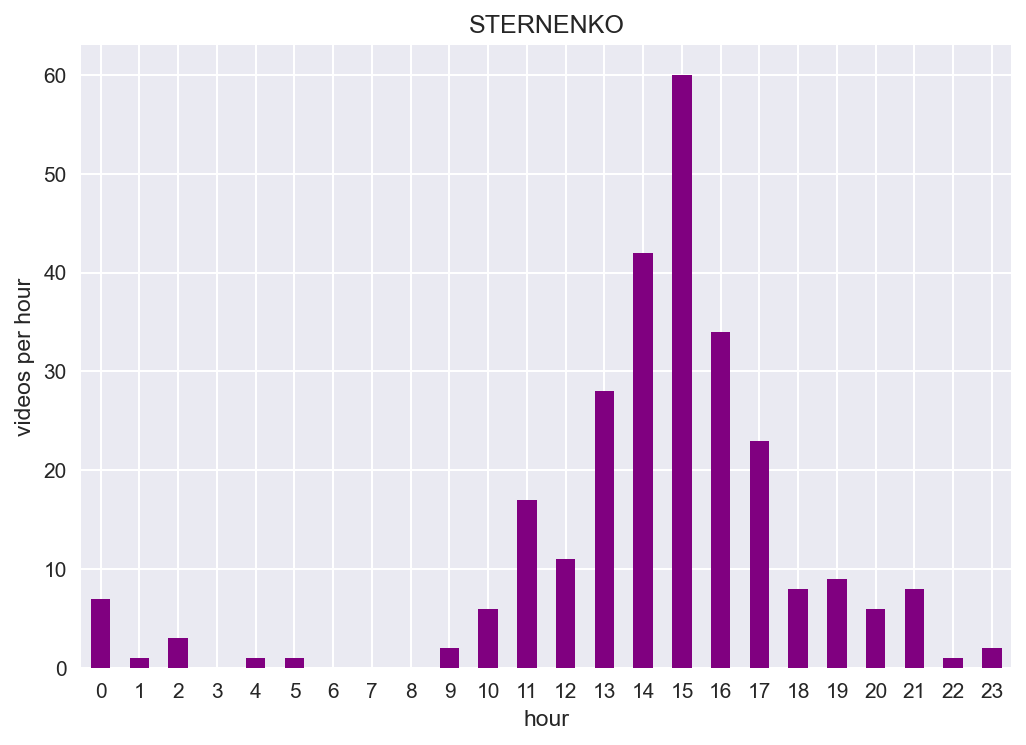

In [27]:
channel_name_to_look = "STERNENKO"
h_bar_plot(df, channel_name_to_look)

### Change in use of a particular channel over months (Use all data for this!)

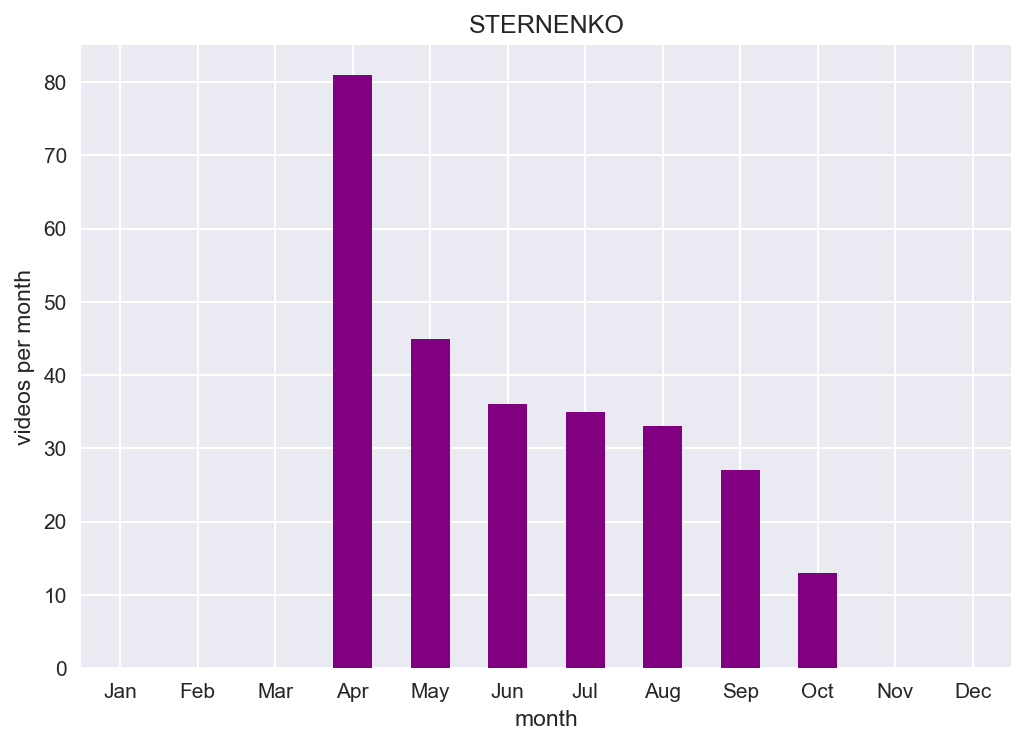

In [28]:
channel_name = "STERNENKO"
month_bar_plot(df, channel_name)

### See how many videos you watched/listened to in YT and YT music over months

In [29]:
yt_df = df.loc[df["app"] == "YouTube"]
yt = get_videos_per_month(yt_df)
music_df = df.loc[df["app"] == "YouTube Music"]
music = get_videos_per_month(music_df)

months = yt.index.tolist()
yt_use_progress = pd.DataFrame({"YT": yt, "YT Music": music}, index=months) 

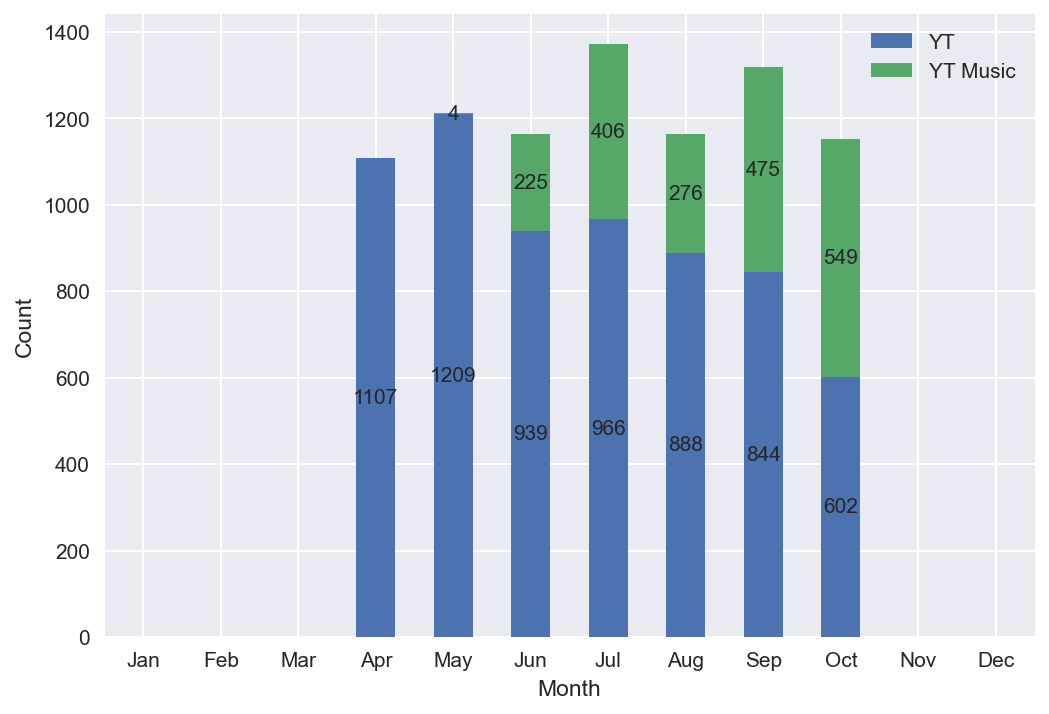

In [30]:
stacked_bar_with_labels(yt_use_progress[["YT", "YT Music"]])

### See how your use of YT music changed in percentages over months

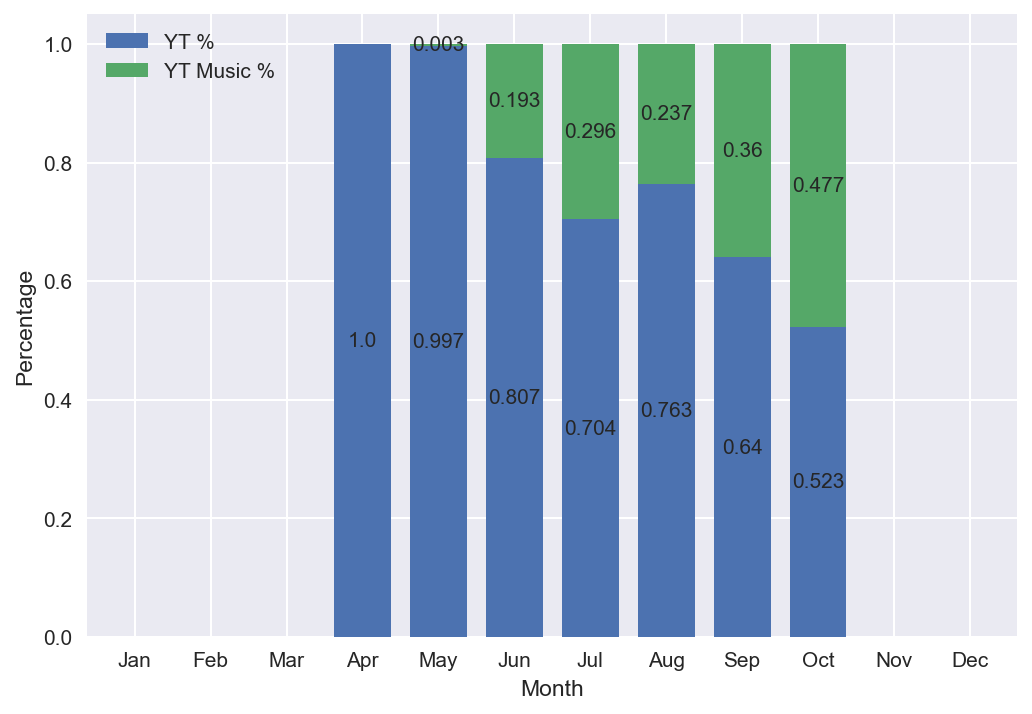

In [31]:
yt_use_progress["Total"] = yt_use_progress["YT"] + yt_use_progress["YT Music"]
yt_use_progress["YT %"] = yt_use_progress["YT"] / yt_use_progress["Total"]
yt_use_progress["YT Music %"] = yt_use_progress["YT Music"] / yt_use_progress["Total"]
yt_use_progress = yt_use_progress.round(3) # round all floats in df to 3 places

stacked_bar_with_labels(yt_use_progress[["YT %", "YT Music %"]], float_num=True, bar_width=0.75)

# Plots that don't need all the data

### Count on how many videos you clicked per channel

In [32]:
counts = df["channel_name"].value_counts()
counts

STERNENKO                  270
Eurovision Song Contest    218
KALUSH                     122
Viva La Dirt League        108
Тартак                     105
                          ... 
Hamilkar Barkas              1
TLDR News                    1
Gung Ho Vids                 1
TJ NZ                        1
АрміяInform                  1
Name: channel_name, Length: 1827, dtype: Int64

### Break into categories

In [33]:
bins = [0, 1, 5, 10, 20, 50, np.inf]
names = ['1', '2-5', '6-10', '11-20', '21-50', ">50"]

intervals = pd.cut(counts, bins, labels=names)

df2 = pd.DataFrame({"video_count": counts, "interval": intervals})
df2

,video_count,interval
STERNENKO,270,>50
Eurovision Song Contest,218,>50
KALUSH,122,>50
Viva La Dirt League,108,>50
Тартак,105,>50
...,...,...
Hamilkar Barkas,1,1
TLDR News,1,1
Gung Ho Vids,1,1
TJ NZ,1,1


### Plot percentage of categories

In [34]:
# Use reindex here, so values get ordered by labels not count
interval_count = df2["interval"].value_counts().reindex(names)
percentage = interval_count/len(df2)
percentage

1        0.626710
2-5      0.236453
6-10     0.052545
11-20    0.035577
21-50    0.032841
>50      0.015873
Name: interval, dtype: float64

<AxesSubplot:title={'center':'Videos per channel'}, ylabel='interval'>

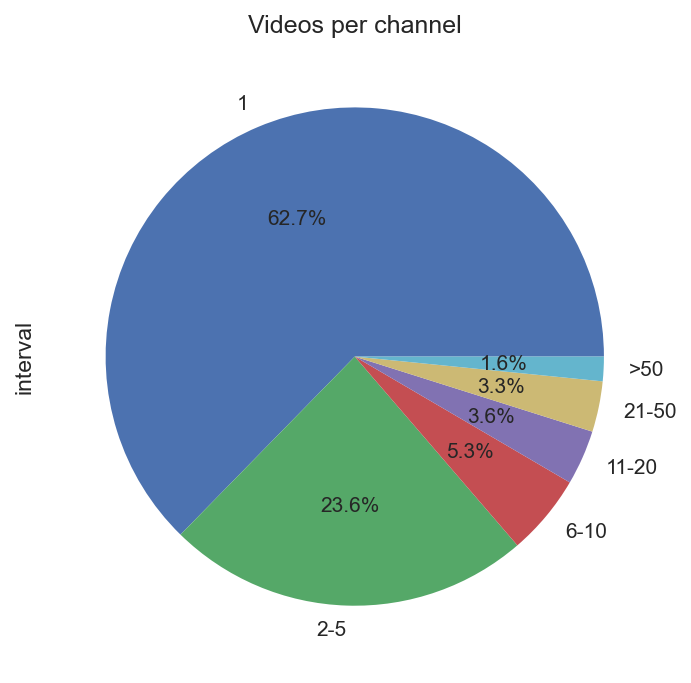

In [35]:
percentage.plot.pie(autopct='%1.1f%%', title="Videos per channel")

### Plot n most watched channels

2341

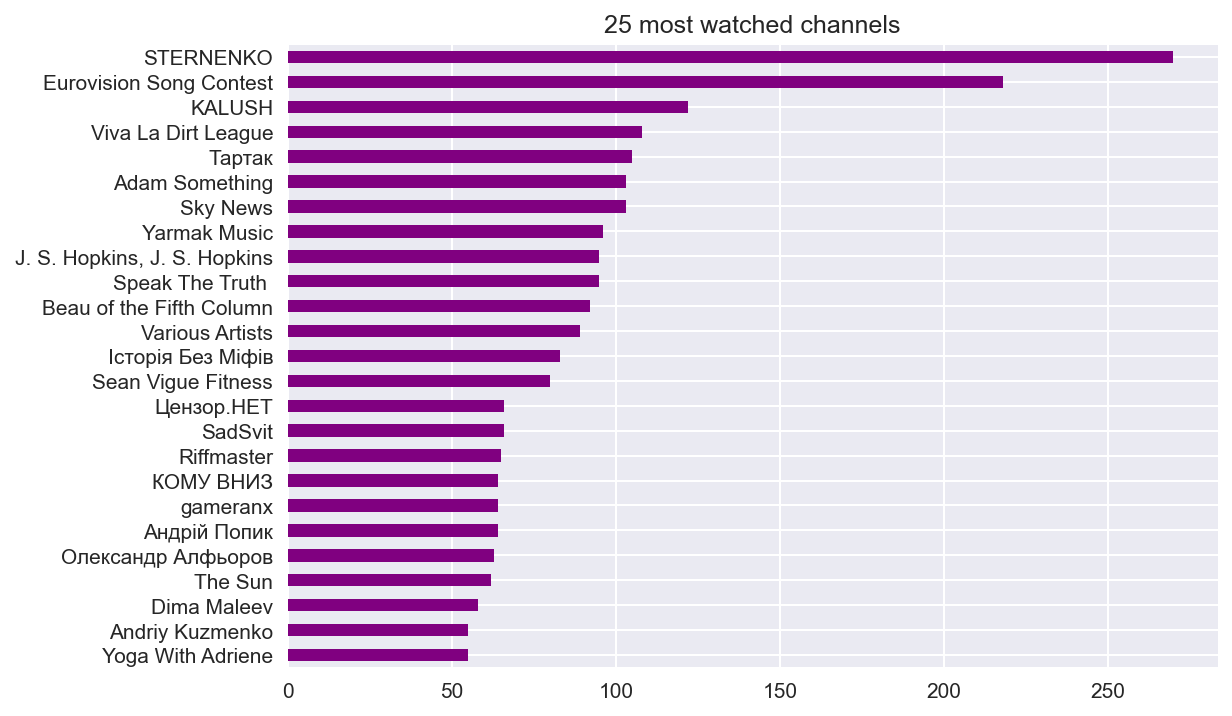

In [36]:
n = 25
top_n_channels = counts.iloc[:n]
ax = top_n_channels.plot(kind="barh", color="purple", title=f"{n} most watched channels")
ax.invert_yaxis()
sum(top_n_channels)

### Count on how many videos you clicked per hour

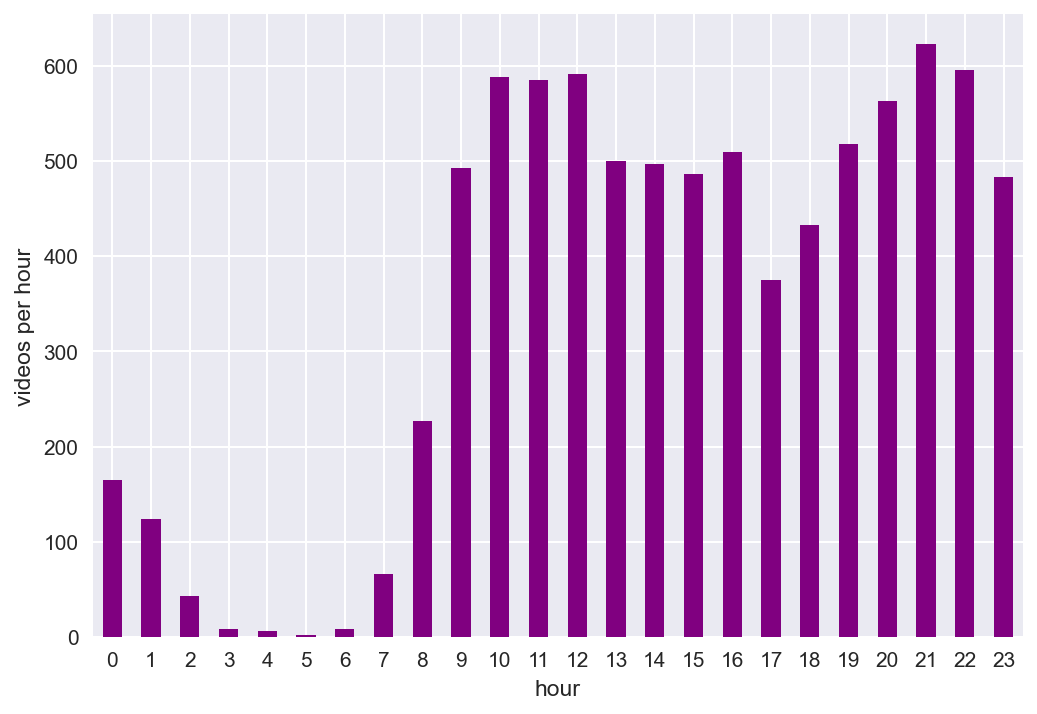

In [37]:
h_bar_plot(df)

### Plot videos count per hour for several channels

In [38]:
list_top_n_channels = top_n_channels.index.to_list()
list_top_n_channels[:10]

['STERNENKO',
 'Eurovision Song Contest',
 'KALUSH',
 'Viva La Dirt League',
 'Тартак',
 'Adam Something',
 'Sky News',
 'Yarmak Music',
 'J. S. Hopkins, J. S. Hopkins',
 'Speak The Truth ']

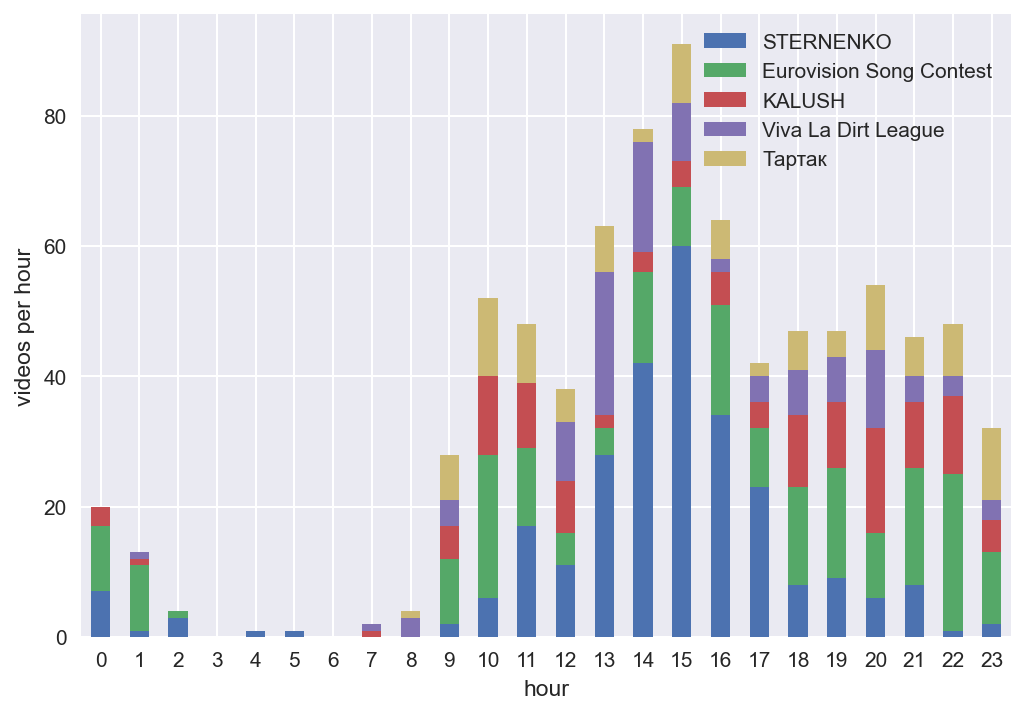

In [39]:
start_point = 0
interval = 5
end_point = start_point + interval

df_data = {f"{list_top_n_channels[start_point]}": get_videos_per_h(
    df, list_top_n_channels[start_point])}
df_top_n_channels = pd.DataFrame(data=df_data)
for i in range(start_point+1, end_point):
    df_top_n_channels[list_top_n_channels[i]] = get_videos_per_h(
        df, list_top_n_channels[i])
df_top_n_channels
df_top_n_channels.plot.bar(stacked=True, rot=0,
                           xlabel="hour", ylabel="videos per hour").legend(bbox_to_anchor=(1,1))

### Count how many videos you click per day of week

<AxesSubplot:>

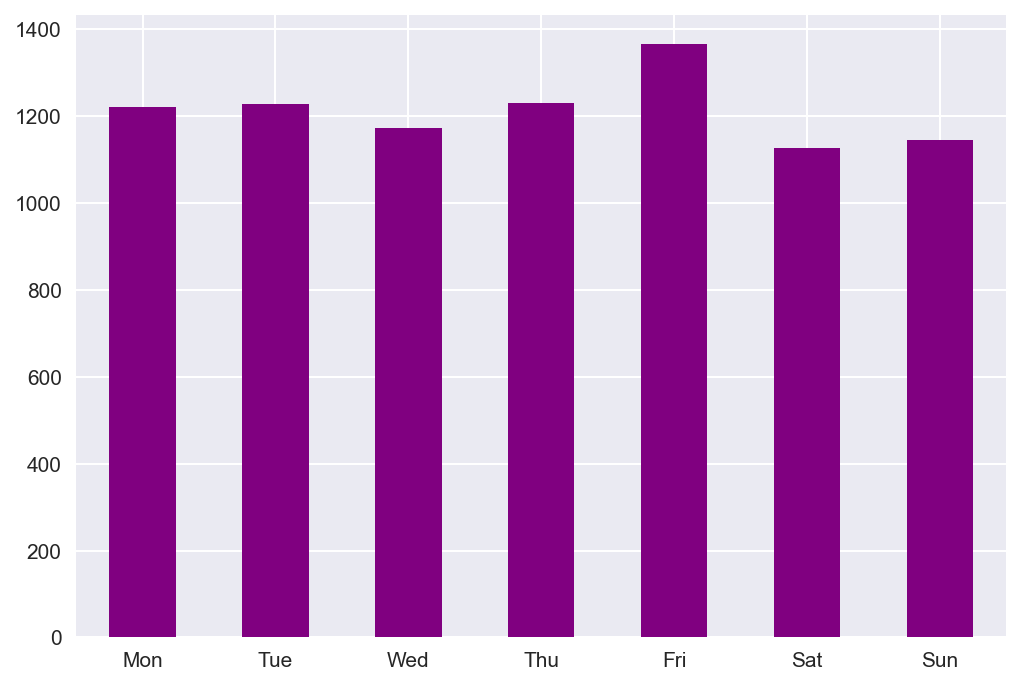

In [40]:
df['weekday'] = df['time'].dt.strftime('%a')
total = len(df["weekday"])
str_week_days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
videos_per_weekday = df["weekday"].value_counts()[str_week_days] # sort with custom index
videos_per_weekday.plot.bar(color="purple", rot=0)

# Compare two subsets

In [41]:
first_subset = 0 # select one time interval
second_subset = 0 # select the other one